### Les Modules de Travail

In [238]:
import pandas as pd
import pandas.plotting
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from matplotlib import animation
from matplotlib.animation import FuncAnimation,FFMpegFileWriter
from mpl_toolkits.mplot3d import Axes3D

### Declaration de workpase

In [239]:
import os
base= r'C:\Users\Jéros\kaggle\ML PratiqueUdemy'
base=base.replace('\\','/')
os.chdir(base)

### Importation des données

In [240]:
Dataset=pd.read_csv('housing.csv')

In [241]:
Dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [242]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [243]:
df=Dataset.copy()
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [244]:
print(df.shape)

(20640, 10)


float64    9
object     1
dtype: int64


<AxesSubplot:ylabel='None'>

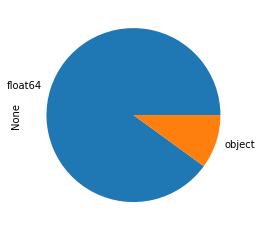

In [245]:
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

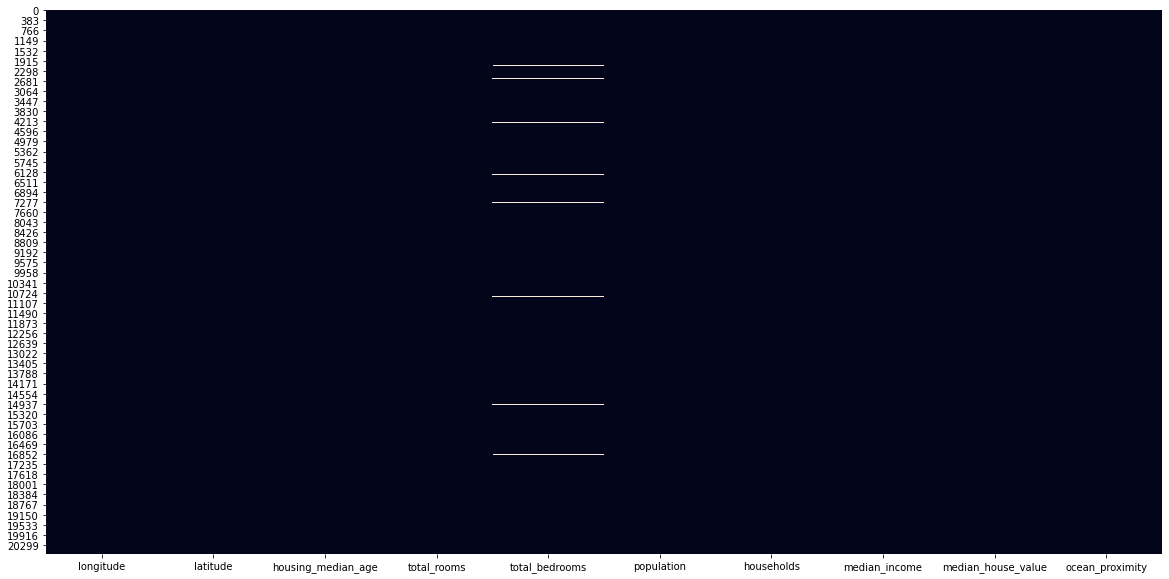

In [246]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Analyse de la variable categorielle

In [247]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [248]:
df['ocean_proximity'].value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [249]:
#Conversion de la variable qualitative en categories
df=df.astype({'ocean_proximity':'category'})

float64     9
category    1
dtype: int64


<AxesSubplot:ylabel='None'>

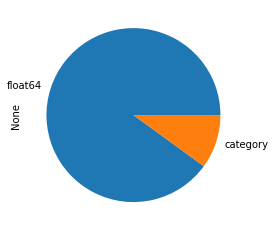

In [250]:
print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie()

### Feacture engineering

In [251]:
df['rooms_per_household']=df['total_rooms']/df['households']

In [252]:
df['bedrooms_per_household']=df['total_bedrooms']/df['households']

In [253]:
df['population_per_household']=df['population']/df['households']

In [254]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [255]:
df=df.drop(['longitude','latitude' ], axis=1)       

In [256]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [257]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062,3.070655
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104,10.386050
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333,0.692308
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029,2.429741
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889,2.818116
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631,3.282261
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


### Visualisation des données

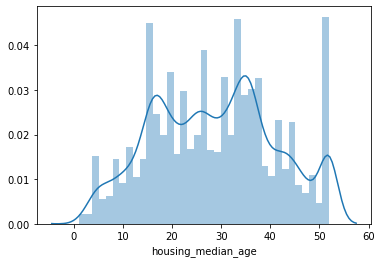

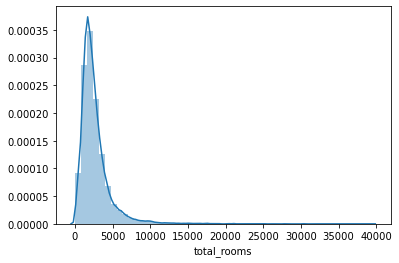

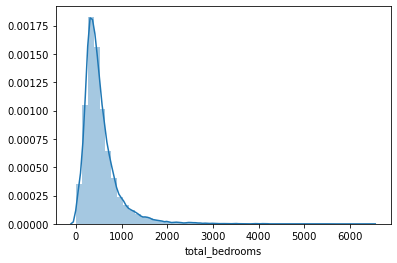

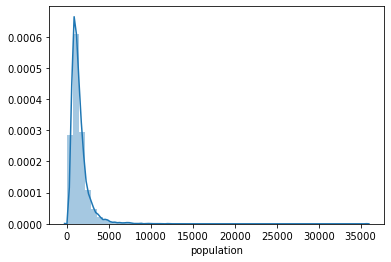

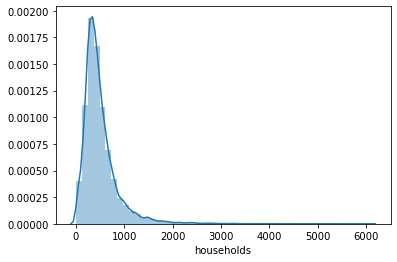

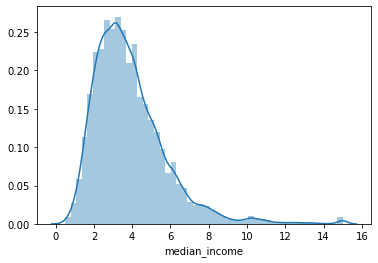

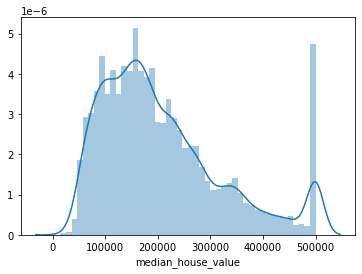

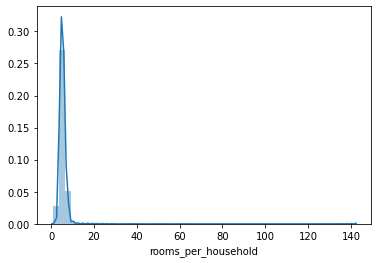

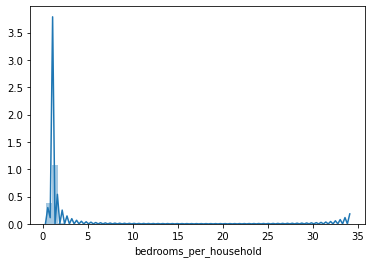

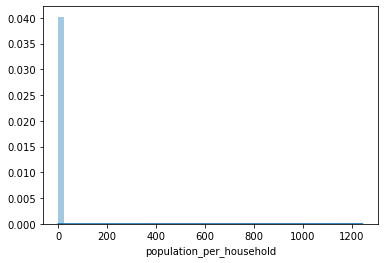

In [258]:
for col in df.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(df[col])

<AxesSubplot:ylabel='ocean_proximity'>

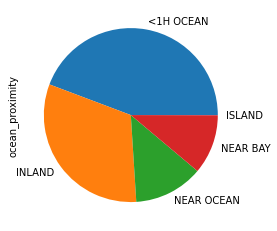

In [259]:
df['ocean_proximity'].value_counts().plot.pie()

<AxesSubplot:>

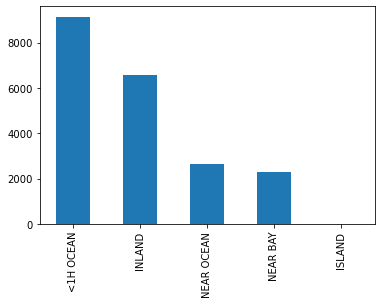

In [260]:
df['ocean_proximity'].value_counts().plot(kind='bar')

#### Etude de variation

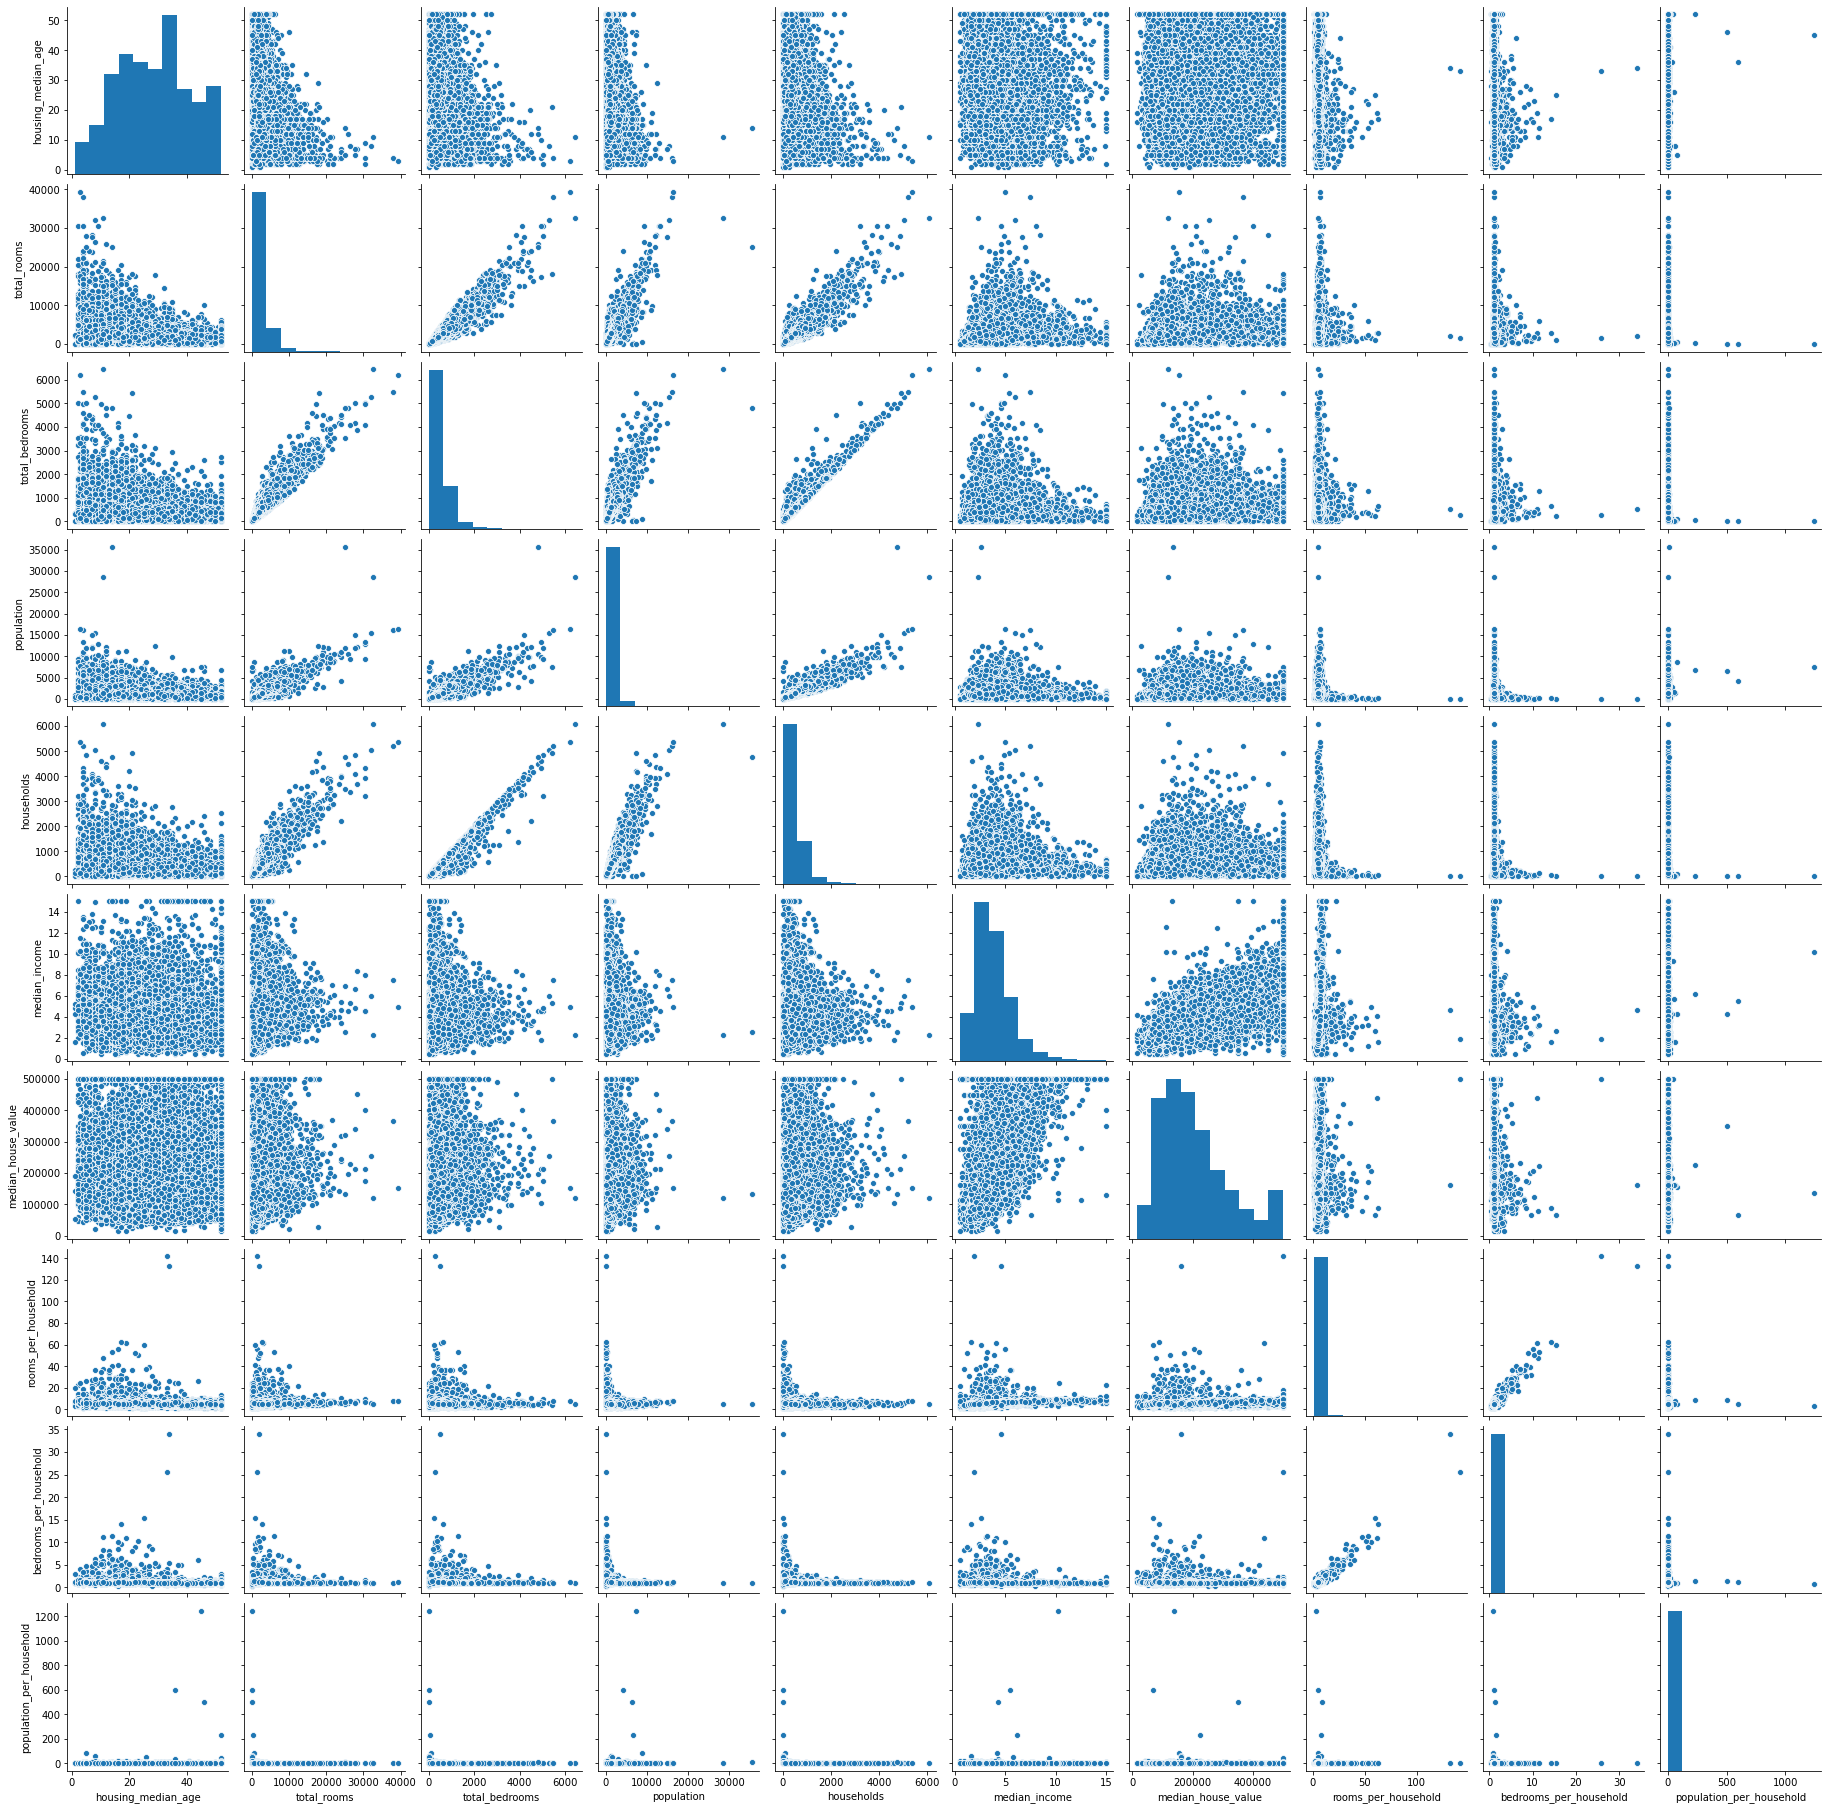

In [261]:
sns.pairplot(df.select_dtypes('float'))

<AxesSubplot:>

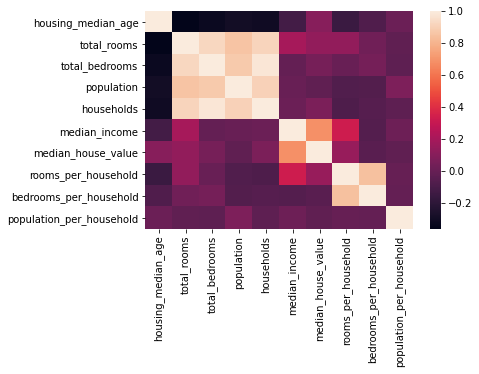

In [262]:
sns.heatmap(df.select_dtypes('float').corr())

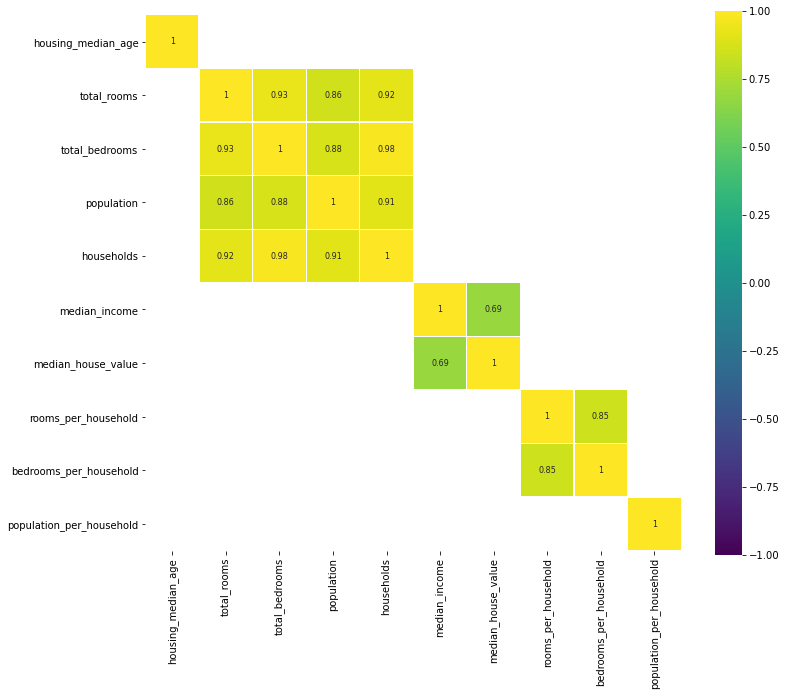

In [263]:
corr = df.select_dtypes('float').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

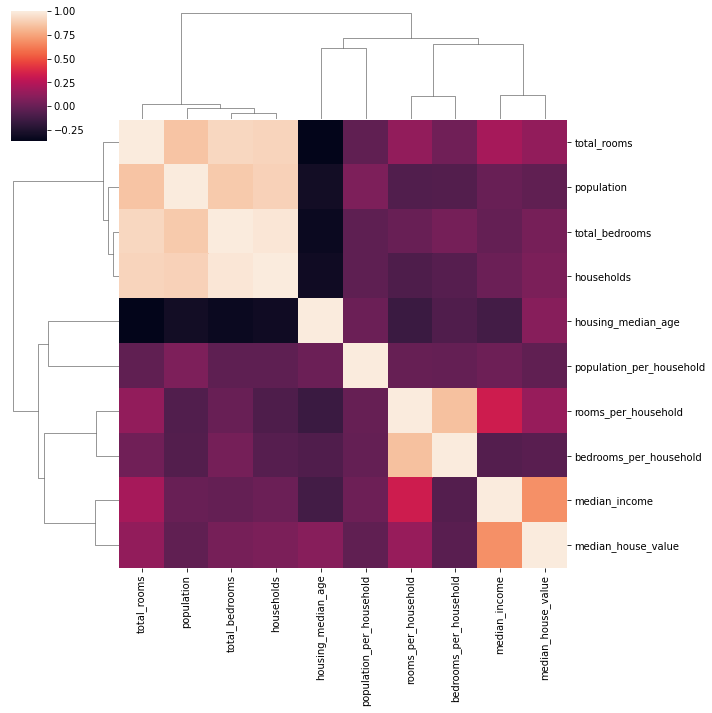

In [264]:
sns.clustermap(df.select_dtypes('float').corr())

### TARGET

In [265]:
df.describe()['median_house_value']

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

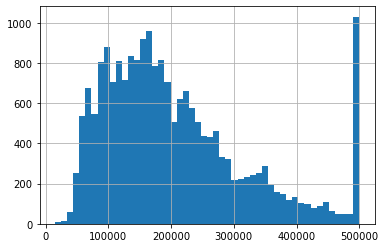

In [266]:
df['median_house_value'].hist(bins= 50)

[]

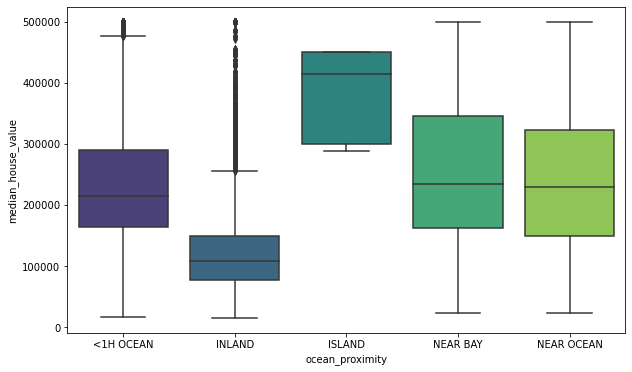

In [339]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

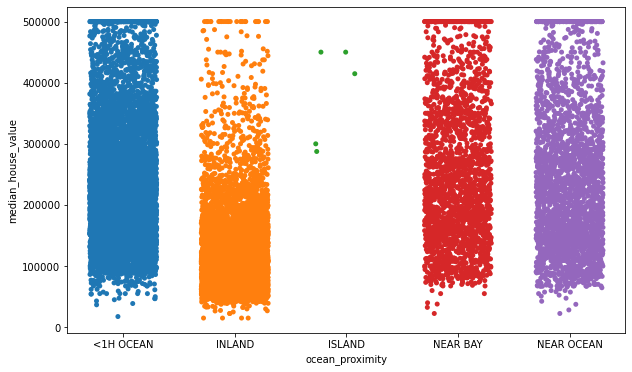

In [340]:
plt.figure(figsize=(10,6))

sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)

## TrainTest - Nettoyage - Encodage

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
trainset, testset = train_test_split(df, test_size=0.1, random_state=42)

In [269]:
X_train=trainset.drop(['median_house_value'],axis=1)
y_train=trainset['median_house_value']
print(trainset.shape)

(18576, 11)


In [270]:
X_test=testset.drop(['median_house_value'],axis=1)
y_test=testset['median_house_value']
print(testset.shape)

(2064, 11)


In [271]:
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
5564,41.0,2475.0,532.0,1416.0,470.0,3.8372,<1H OCEAN,5.265957,1.131915,3.012766
16016,52.0,3547.0,506.0,1276.0,491.0,8.0069,NEAR BAY,7.224033,1.030550,2.598778
17131,30.0,4198.0,1244.0,2678.0,1147.0,3.6712,NEAR BAY,3.659983,1.084568,2.334786
11752,16.0,1608.0,296.0,792.0,286.0,3.1583,INLAND,5.622378,1.034965,2.769231
2308,15.0,2793.0,436.0,1411.0,441.0,4.9292,INLAND,6.333333,0.988662,3.199546


In [272]:
X_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
20046,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND,4.192201,NaN,3.877437
3024,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND,5.039384,NaN,2.679795
15663,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY,3.977155,NaN,1.360332
20484,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN,6.163636,NaN,3.444444
9814,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,NaN,2.483645


In [273]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
9477      96000.0
46       142500.0
20462    266300.0
4751     165000.0
13298    118000.0
Name: median_house_value, Length: 2064, dtype: float64

In [274]:
y_train

5564     156400.0
16016    426800.0
17131    308600.0
11752    239200.0
2308     109400.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 18576, dtype: float64

### Pipeline  de transformation

In [275]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

In [276]:
X_train.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household'],
      dtype='object')

float64     9
category    1
dtype: int64


<AxesSubplot:ylabel='None'>

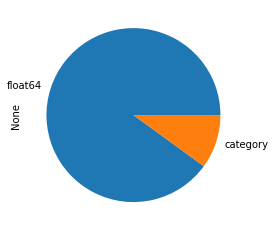

In [277]:
print(X_train.dtypes.value_counts())
X_train.dtypes.value_counts().plot.pie()

In [278]:
X_test.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household'],
      dtype='object')

float64     9
category    1
dtype: int64


<AxesSubplot:ylabel='None'>

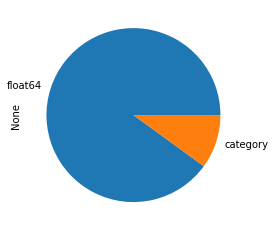

In [279]:
print(X_test.dtypes.value_counts())
X_test.dtypes.value_counts().plot.pie()

In [280]:
numerical_features = list(X_train.select_dtypes(include=['float64']))
categorical_features = list(X_train.select_dtypes(include=['category']))

In [281]:
numerical_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household']

In [282]:
categorical_features

['ocean_proximity']

In [283]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

In [284]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder())])

In [285]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

In [286]:
preprocessorS = ColumnTransformer(transformers=[('num', numeric_transformer, selector(dtype_exclude="category")),
                                                ('cat', categorical_transformer, selector(dtype_include="category"))])

## Modellisation

In [287]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [288]:
model = Pipeline(steps=[('preprocessor', preprocessor),('LinearRegression', LinearRegression())])
model.fit(X_train, y_train)
model.score(X_test, y_test)
print(model.score(X_test, y_test))
y_pred= model.predict(X_test)
y_pred= y_pred.reshape(-1,1)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

0.6083082904604067
MAE: 51944.63717986529
MSE: 5223637289.724446
RMSE: 72274.73479525502


In [289]:
modelS = Pipeline(steps=[('preprocessor', preprocessorS),('SGDClassif', LinearRegression())])


modelS.fit(X_train, y_train)
print("model score: %.3f" % modelS.score(X_test, y_test))

model score: 0.608


#### Chaine de transfromation et modèle

In [290]:
TreeDecision =Pipeline(steps=[('preprocessor', preprocessor),('Decision', DecisionTreeRegressor(random_state=0))])
RandomForest = Pipeline(steps=[('preprocessor', preprocessor),('RandomForest', RandomForestRegressor(n_estimators=10,random_state=0))]) 
SVCmodel = Pipeline(steps=[('preprocessor', preprocessor),('SVR', SVR(kernel='rbf'))])
GradientRegressor =Pipeline(steps=[('preprocessor', preprocessor),('GradientRegressor', GradientBoostingRegressor(random_state=0))])
KNN = Pipeline(steps=[('preprocessor', preprocessor),('KNN', KNeighborsRegressor(n_neighbors=5))])
#SGDRegressor = Pipeline(steps=[('preprocessor', preprocessor),('SGDRegressor', SGDRegressor())])

In [291]:
dict_of_models = {'TreeDecision' : TreeDecision,
                  'RandomForest':RandomForest,
                  'SVCmodel':SVCmodel,
                  'GradientRegressor':GradientRegressor,
                  'KNN':KNN,
                  #'SGDRegressor':SGDRegressor
                  }

In [292]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [293]:
def evaluation(model):
    model.fit(X_train, y_train)#apprentissage des données
    model.score(X_test, y_test) 
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    y_pred= model.predict(X_test) #prediction des valeurs
    y_pred= y_pred.reshape(-1,1)
    
    print('SCORE:',model.score(X_test, y_test))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print("\n")
    
    plt.figure(figsize=(15,8))
    plt.scatter(X_test.iloc[:,1],y_test)
    plt.scatter(X_test.iloc[:,1],y_pred,c='r')
    plt.show()
    
    #plt.figure(figsize=(16,8))
    #plt.plot(y_test,label ='Test')
    #plt.plot(y_pred, label = 'predict')
    #plt.show()

TreeDecision
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SCORE: 0.5060334272670353
MAE: 55410.65503875969
MSE: 6587584435.315891
RMSE: 81163.93555832474




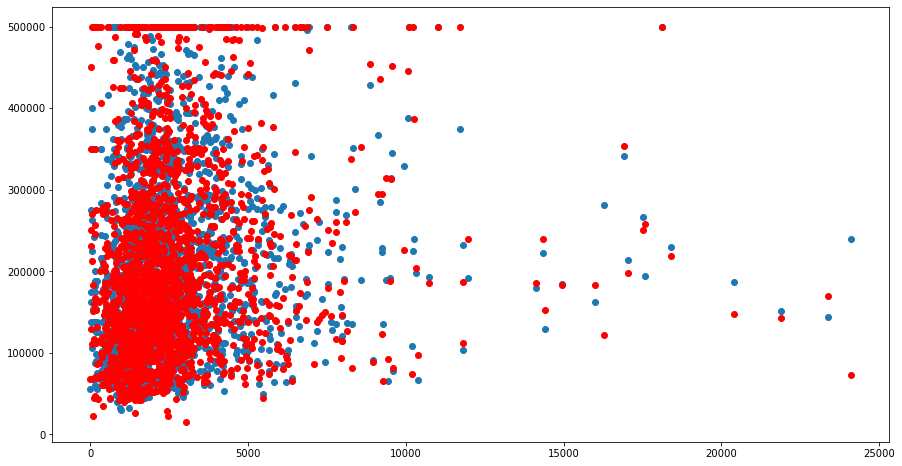

RandomForest
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SCORE: 0.7077366696108536
MAE: 43109.46579457365
MSE: 3897651121.6801257
RMSE: 62431.17107407265




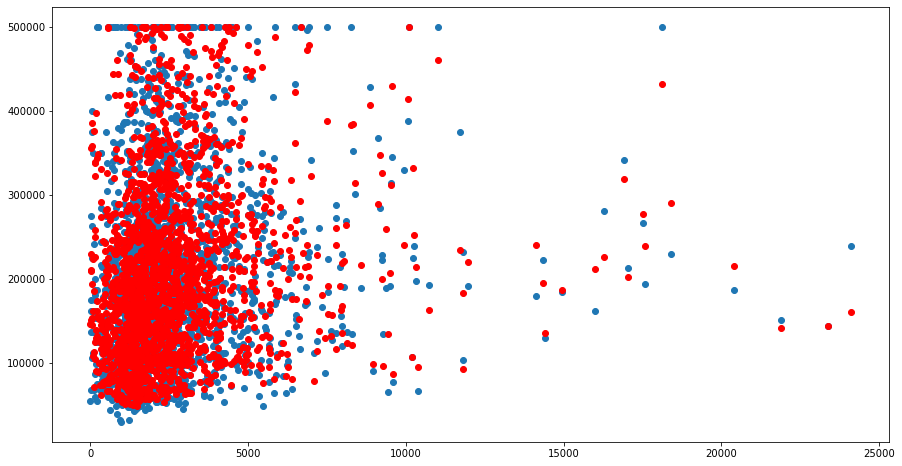

SVCmodel
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SCORE: -0.04587750123855794
MAE: 88239.45649399354
MSE: 13947920221.174131
RMSE: 118101.31337616078




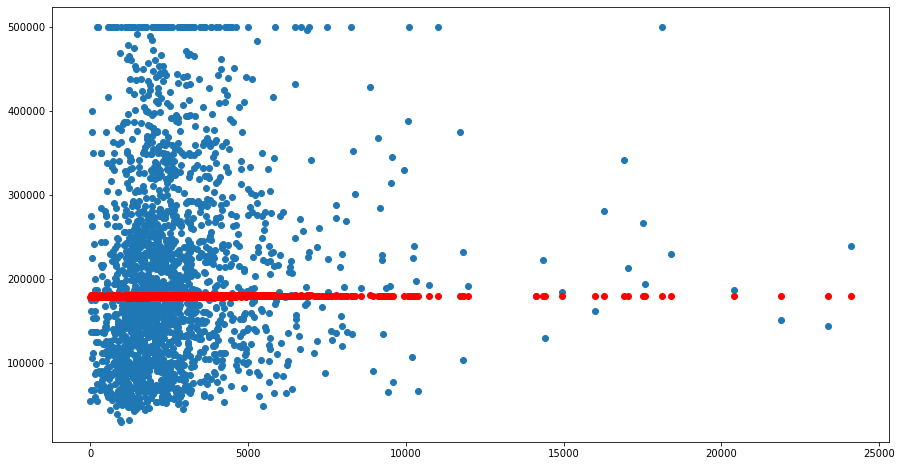

GradientRegressor
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SCORE: 0.7159753818362813
MAE: 43191.325267266984
MSE: 3787778884.5305595
RMSE: 61544.933865677034




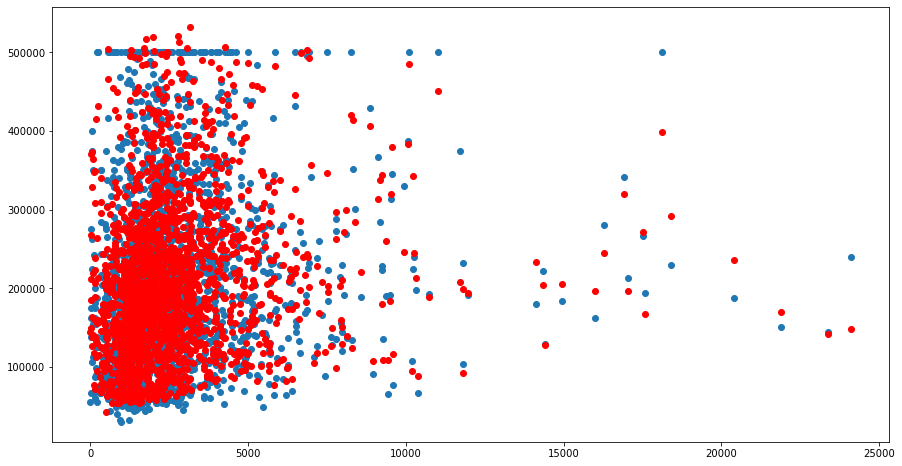

KNN
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SCORE: 0.6631144290454555
MAE: 46364.76976744187
MSE: 4492737497.244341
RMSE: 67027.88596729231




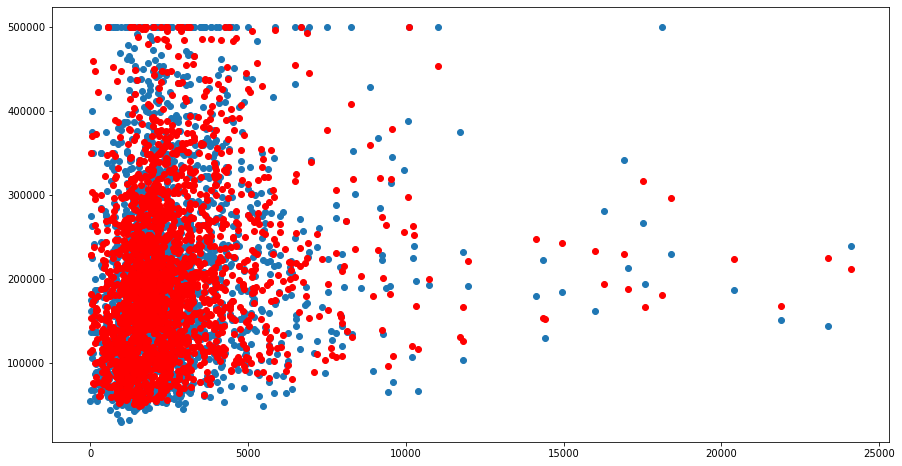

In [294]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

### prediction des prix

In [295]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8],'max_depth':[6,8,10]}]

In [315]:
model_final=RandomForestRegressor(random_state=42, n_jobs=-1)

In [316]:
grid_search = GridSearchCV(model_final, param_grid, cv=5,scoring='neg_mean_squared_error')#initialisation
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'max_depth': [6, 8, 10], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

In [319]:
X_train_prepared=preprocessor.fit_transform(X_train)

In [320]:
print(X_train_prepared.shape)
print(X_train_prepared[0])

(18576, 14)
[ 0.98351287 -0.07457422 -0.01398847 -0.00969912 -0.07768305 -0.01883674
 -0.06631495  0.07201694 -0.00644337  1.          0.          0.
  0.          0.        ]


In [321]:
grid_search.fit(X_train_prepared, y_train) #apprentissage du modèle

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'max_depth': [6, 8, 10], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

In [322]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 8, 'n_estimators': 30}


#### Modele finale 

In [323]:
RandomForest = Pipeline(steps=[('preprocessor', preprocessor),('RandomForest', RandomForestRegressor(n_estimators=30,random_state=42,max_depth=10,max_features=8))])

In [324]:
RandomForest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_household',
                                                   'populat

In [325]:
RandomForest.fit(X_train, y_train)
RandomForest.score(X_test, y_test)
print(RandomForest.score(X_test, y_test))
y_pred= RandomForest.predict(X_test)
y_pred= y_pred.reshape(-1,1)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

0.726321919304894
MAE: 41691.32518702545
MSE: 3649796492.7048454
RMSE: 60413.54560613741


In [326]:
y_pred

array([[ 65365.69198953],
       [ 95034.34555583],
       [411280.86410277],
       ...,
       [281956.94190614],
       [145960.85103121],
       [118499.38072521]])

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SCORE: 0.726321919304894
MAE: 41691.32518702545
MSE: 3649796492.7048454
RMSE: 60413.54560613741




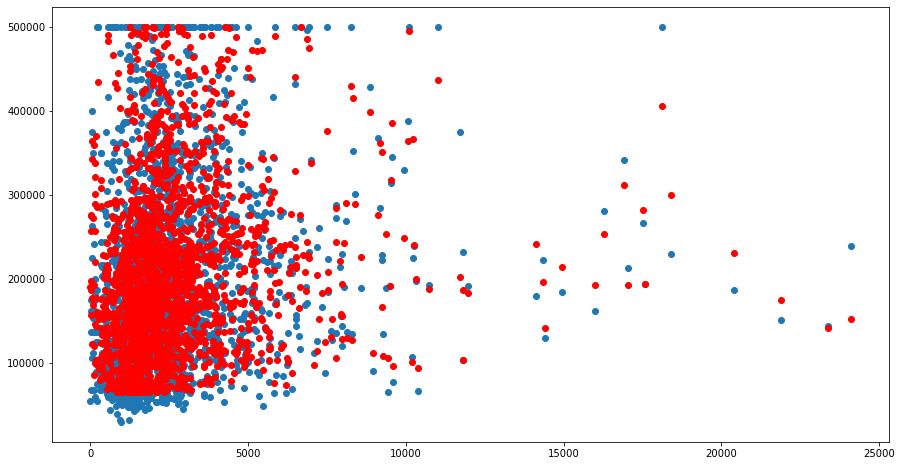

In [328]:
evaluation(RandomForest)

### Transmission des resultats

In [330]:
RandomForest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_household',
                                                   'populat

In [359]:
RandomForest.steps[1]

('RandomForest',
 RandomForestRegressor(max_depth=10, max_features=8, n_estimators=30,
                       random_state=42))

In [343]:
encoder = OneHotEncoder()

In [344]:
encoder.fit_transform(X_train[categorical_features])

<18576x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18576 stored elements in Compressed Sparse Row format>

In [347]:
encoded_name=encoder.get_feature_names()
encoded_name

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [350]:
list_features=np.append(numerical_features,encoded_name)
list_features=list(list_features)
list_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household',
 'x0_<1H OCEAN',
 'x0_INLAND',
 'x0_ISLAND',
 'x0_NEAR BAY',
 'x0_NEAR OCEAN']

In [353]:
df_features=pd.DataFrame(data=list_features,columns=['feature'])
df_features

,feature
0,housing_median_age
1,total_rooms
2,total_bedrooms
3,population
4,households
5,median_income
6,rooms_per_household
7,bedrooms_per_household
8,population_per_household
9,x0_<1H OCEAN


In [357]:
df_features['importance']=RandomForest.steps[1][1].feature_importances_

In [358]:
df_features

,feature,importance
0,housing_median_age,0.049264
1,total_rooms,0.011377
2,total_bedrooms,0.012205
3,population,0.010446
4,households,0.009872
5,median_income,0.515382
6,rooms_per_household,0.037002
7,bedrooms_per_household,0.019111
8,population_per_household,0.122534
9,x0_<1H OCEAN,0.007285
